#  Zuber Analysis

Create and visualize datasets and graphs to better understand passanger preferences. Also find patterns in the available information along with the impact of external forces on ride frequency.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
result_01 = pd.read_csv('/datasets/project_sql_result_01.csv') 
result_04 = pd.read_csv('/datasets/project_sql_result_04.csv') 
result_07 = pd.read_csv('/datasets/project_sql_result_07.csv') 

# Exploritory Data Analysis

# Result_01

In [3]:
result_01.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
# check for missing values and datatypes
result_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


# Result_04

In [5]:
result_04.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [6]:
# check for missing values and datatypes
result_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


# Result_07

In [7]:
result_07.head(5)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [8]:
# check for missing values and datatypes
result_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [9]:
# change datatype for start_ts to datetime
result_07['start_ts'] = pd.to_datetime(result_07['start_ts'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Top 10 Neighborhoods in terms of Dropoff

In [10]:
#display top ten in order
top_10 = result_04.sort_values(by= 'average_trips', ascending=False).round(2).head(10)
display(top_10)


,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90
5,Lake View,2420.97
6,Grant Park,2068.53
7,Museum Campus,1510.00
8,Gold Coast,1364.23
9,Sheffield & DePaul,1259.77


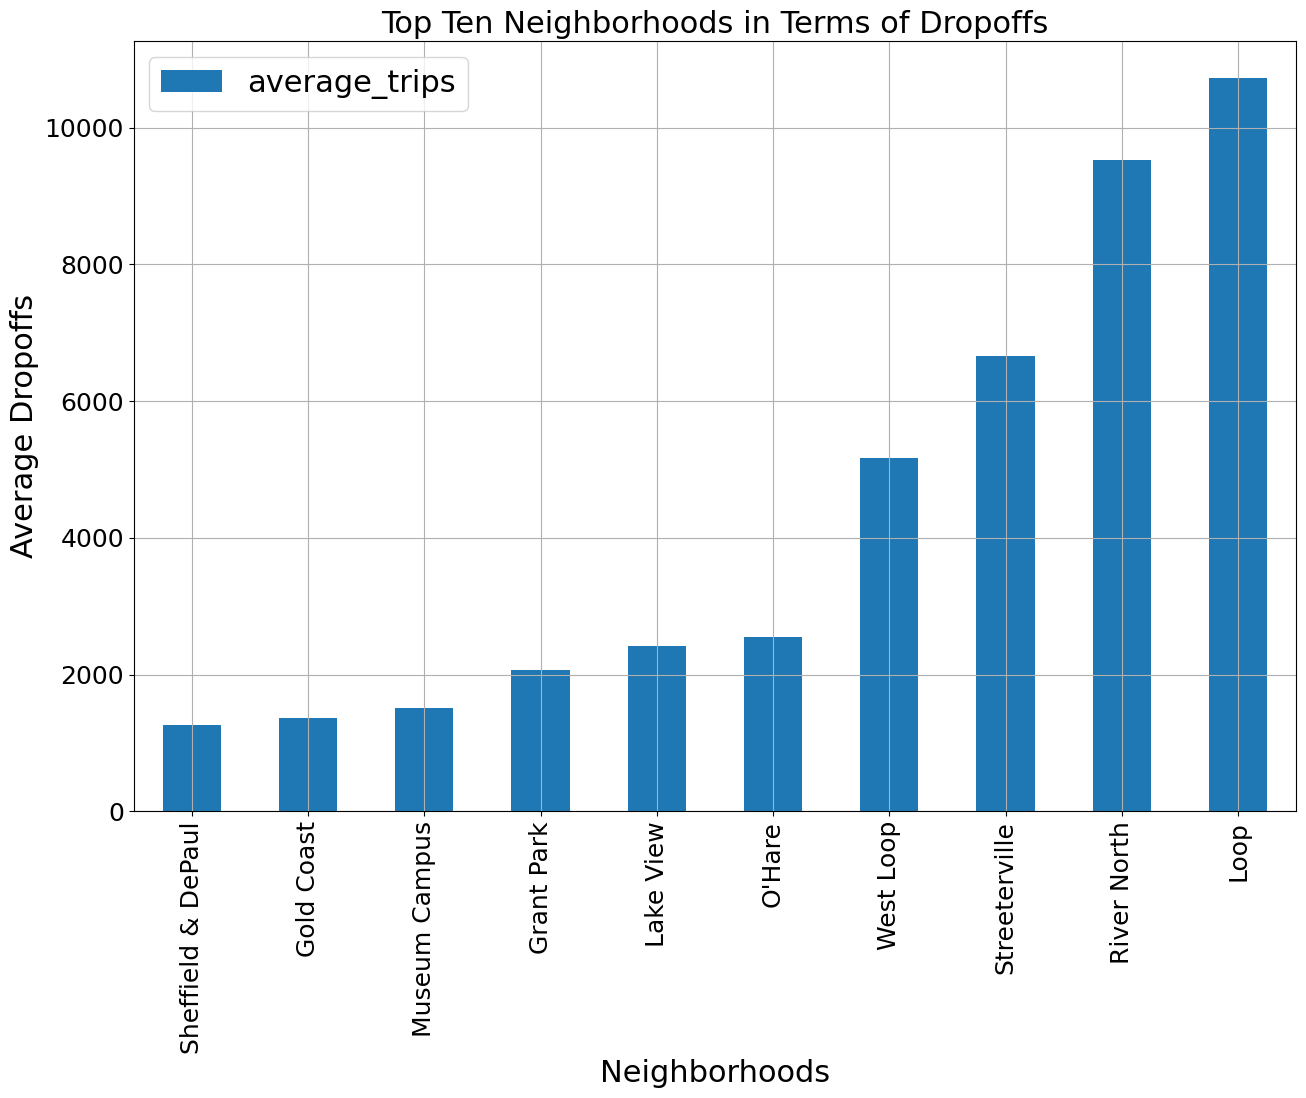

In [11]:
#graph the above dataset
top_10 = top_10.sort_values(by= 'average_trips')
ax = top_10.set_index('dropoff_location_name').plot.bar(grid=True, figsize=(15, 10))
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_title('Top Ten Neighborhoods in Terms of Dropoffs', fontsize=22)
ax.set_xlabel('Neighborhoods', fontsize=22)
ax.set_ylabel('Average Dropoffs', fontsize=22)
ax.legend(fontsize=22)
plt.show()

The Loop neighborhood is our leader in terms of average dropoffs at just over 10,700 average trips. The next three top neighborhoods, River North, Streeterville, and West Loop, are all above 5,000 average trips. The rest of the neighborhoods average trips fall below 2,600 average trips.

# Number of Rides for Each Taxi Company

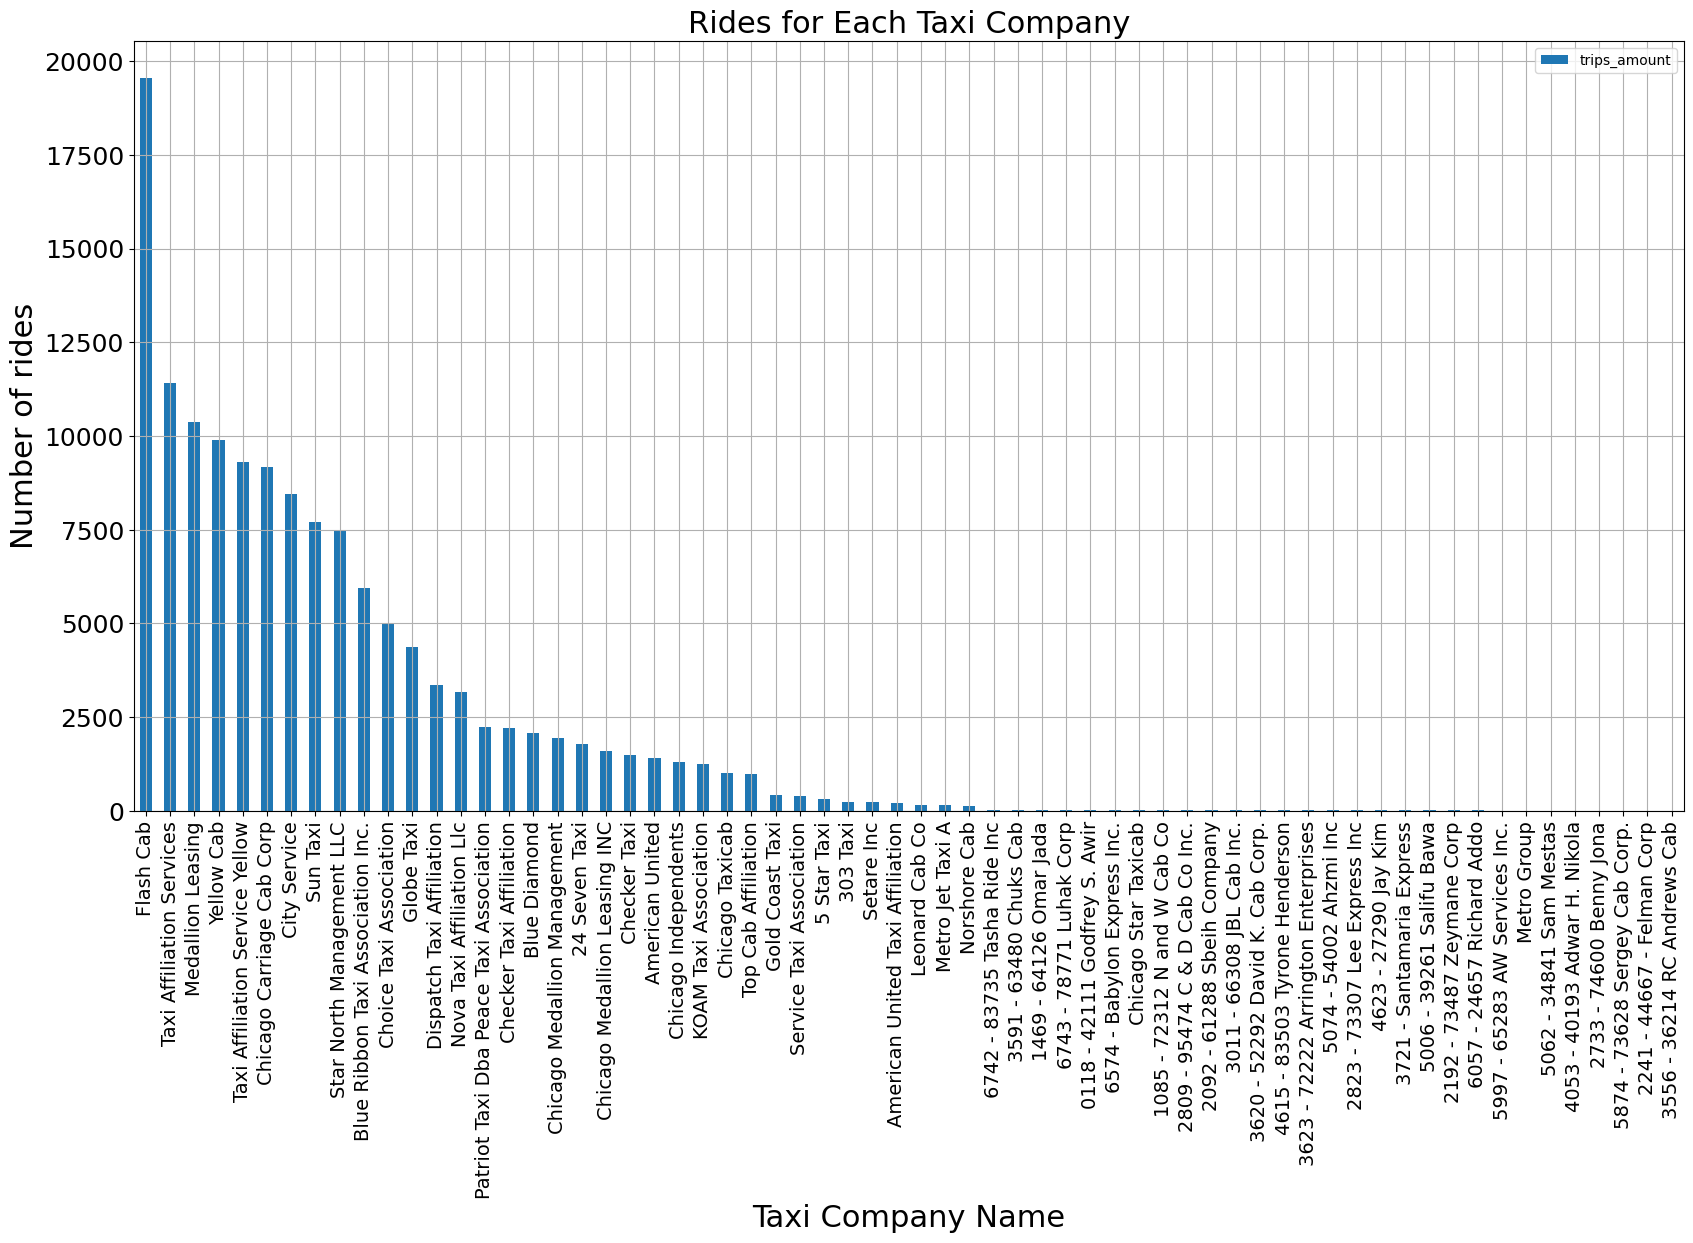

In [12]:
ax = result_01.set_index('company_name').plot.bar(grid=True, figsize=(20, 10))
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=18)
ax.set_title('Rides for Each Taxi Company', fontsize=22)
ax.set_xlabel('Taxi Company Name', fontsize=22)
ax.set_ylabel('Number of rides', fontsize=22)

plt.show()

Almost half of our companies have little to no rides and makes the graph hard to read and visualize. We will remove those and group them to their own 'others' category. The top 26 companies were chosen because we can see a more clear dropoff between Top Cab Affiliation and Gold Coast Taxi. Top Cab Affiliation hit just short of 1000 rides, while Gold Coast Taxi didn't even reach 500.

In [13]:
top_companies = result_01.sort_values(by='trips_amount', ascending=False).head(27)

#sum other companies rides
sum_others = result_01.loc[~result_01['company_name'].isin(top_companies['company_name']), 
                           'trips_amount'].sum()

#put original dataset with 'sum_others' together
top_companies = top_companies.append({'company_name': 'Others', 'trips_amount':sum_others}, 
                               ignore_index=True).sort_values(by='trips_amount', ascending=False)
top_companies.head(27)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


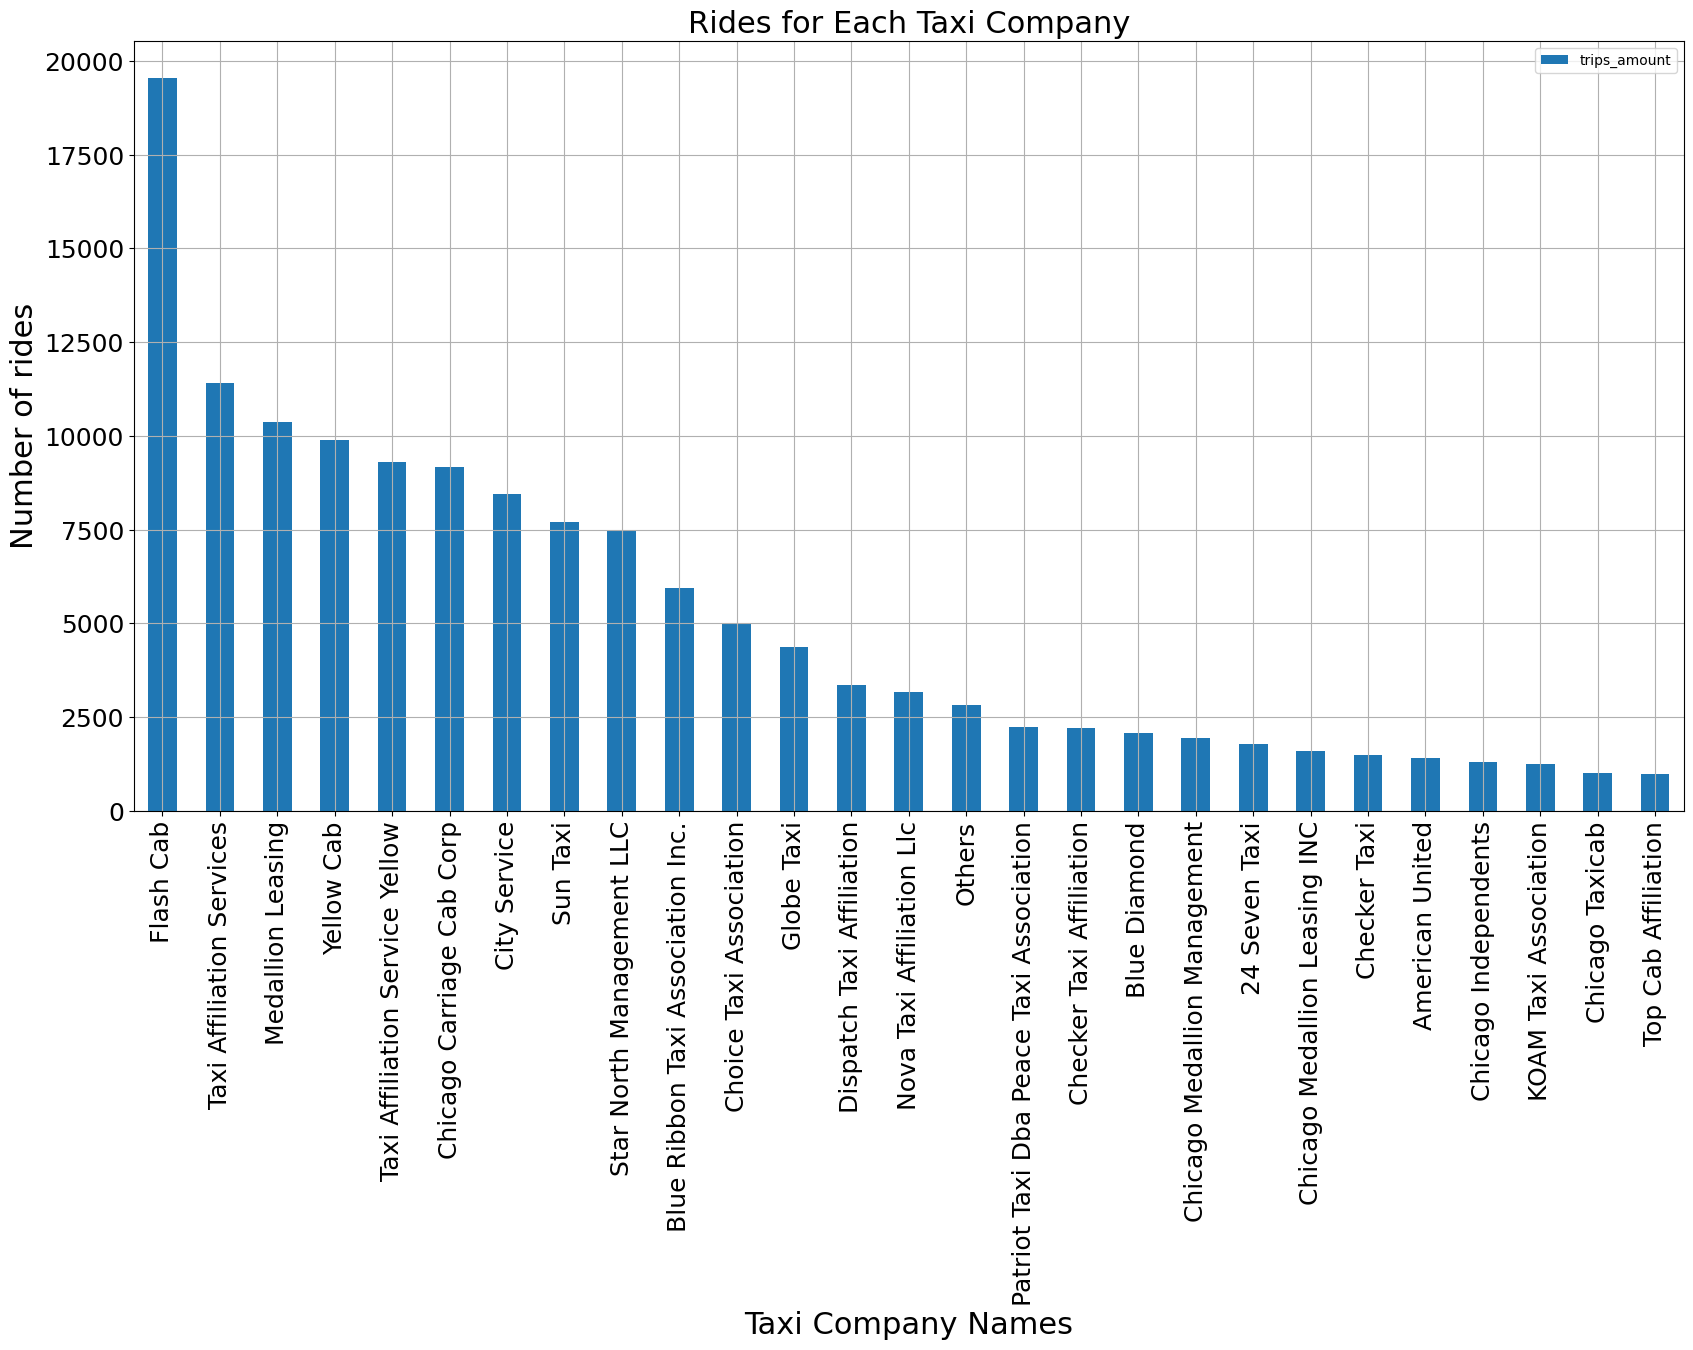

In [14]:
# graph the above dataset
top_companies = result_01.sort_values(by='trips_amount', ascending=False).head(26)

sum_others = result_01.loc[~result_01['company_name'].isin(top_companies['company_name']), 
                           'trips_amount'].sum()

top_companies = top_companies.append({'company_name': 'Others', 'trips_amount':sum_others}, 
                               ignore_index=True).sort_values(by='trips_amount', ascending=False)

ax = top_companies.set_index('company_name').plot.bar(grid=True, figsize=(20, 10))
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_title('Rides for Each Taxi Company', fontsize=22)
ax.set_xlabel('Taxi Company Names', fontsize=22)
ax.set_ylabel('Number of rides', fontsize=22)
plt.show()

We see that Flash Cab stands out over all of the other taxi companies, it leads with just short of 20,000 rides. After that, the rest of the taxi company's rides taper steadily off until the number of rides for Patriot Taxi Dba Peace Taxi Association. This is the first company in which the rides drop below 2500 rides. Once the graph hits this company the slope of the bar graph isn't as steep, but the rest of the companies stay below 2500 rides. Lastly we see that the sum of all the rest of the companies not in the top 26, recorded as 'others' falls roughly in the middle of the the top 26 companies in terms of number of rides.

# Testing Hypothesis

## "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

In [15]:
#run ttest
bad_weather = result_07[result_07['weather_conditions'] == 'Bad']['duration_seconds']
good_weather = result_07[result_07['weather_conditions'] == 'Good']['duration_seconds']


alpha = 0.05#set significance level

#ttest
results_eq = st.ttest_ind(bad_weather, good_weather, equal_var=False)

#print results
print('p-value:', results_eq.pvalue)

if (results_eq.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 6.738994326108734e-12
We reject the null hypothesis


NULL HYPOTHESIS - The weather does not affect the average duration of rides from Loop to O'Hare International Airport on Saturdays.
ALTERNATIVE HYPTHESIS - The weather affects the average duration of rides from Loop to O'Hare International Airport on Saturdays.

We ran the t-test to determine if the average duration of rides from Loop to O'Hare International Airport are affected by weather. In runnin the test, the p-vlaue was less than our  significance level of 5% allowing us to reject the hypothesis. This lets us assume that our alternative hypothesis, the weather does affect the average duration of rides from Loop to O'Hare International Airport, is instead correct.

# Conclusion

Multiple datasets were sorted and made into graphs to visualize the top ten neighborhoods in terms of dropsoffs and the rides per taxi company. The top four most relevant neighborhoods were Loop, River North, Streeterville, and West Loop. After seeing the initial graph for the taxi companies and the number of rides, around hald had zero to no rides. They were removed to make a cleaner more readable chart. Flash Cab dominates with almost 20,000 rides, everyone else falls under 12,000 rides. After seeing if weather affects average duration of rides from Loop to O'Hare International Airport, it can be assumed that weather does affect the average duration of  rides.